# Datashader Work...
Right now running in custom environment, still need to set up all the dependencies within the ipyradiant environment.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
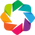

In [41]:
import networkx as nx
import traitlets as T
import ipywidgets as W
from ipyradiant import LoadWidget
from rdflib import BNode, Graph, Literal, URIRef
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import holoviews as hv
from holoviews.operation.datashader import datashade, bundle_graph, dynspread
hv.extension('bokeh')
import ipycytoscape

Start with a load widget to load in a .ttl file and put it into rdf_form..

In [2]:
lw = LoadWidget()
lw

LoadWidget(children=(LoadBox(children=(Label(value='Click to load file:'), FileUpload(value={}, accept='.rdf,.…

In [3]:
n_nodes = W.IntSlider(min=10, max=700)
n_nodes

IntSlider(value=10, max=700, min=10)

In [4]:
rdf_graph = lw.graph

Use the SPARQLQueryFramer to develop a query on the RDF graph and get a subset of data.

In [5]:
#we're using the rdf_graph from (5) 
import logging
import re
from pandas import DataFrame
from rdflib import Graph
from rdflib.plugins.sparql import prepareQuery
# pattern used to identify bindings in a sparql string
BINDING_PATTERN = re.compile(r"\?([\w]*)")
class SPARQLQueryFramer:
    """A generic Class for building and running SPARQL queries with rdflib.
    TODO need test
    :param initNs: a dict of namespace {term: namespace} to use in rdflib prepareQuery
    :param classBindings: a dict of bindings to set at the class level
        (independent of initBindings).
    :param sparql: a SPARQL parse-able string to use during query
    :param index: an index list to use when building a query result DataFrame
    :param columns: a list of strings to use as column headers for
        the query result DataFrame
    :param query: a valid rdflib Query object
    """
    initNs = {}
    classBindings = {}
    sparql = ""
    index = []
    columns = None
    query = None
    # low cost trait (previous cls.sparql state)
    p_sparql = ""
    @classmethod
    def print_vars(cls) -> None:
        """Utility function to print variables that may be used as bindings
        """
        logging.info("Only variables in the SELECT line are printed.")
        tmp_graph = Graph()
        # Run fake query to print vars
        if not cls.query:
            tmp_query = prepareQuery(cls.sparql, initNs=cls.initNs)
            tmp_res = tmp_graph.query(tmp_query)
        else:
            tmp_res = tmp_graph.query(cls.query)
        print("Vars:\n", sorted([str(var) for var in tmp_res.vars]))
    @classmethod
    def print_potential_bindings(cls) -> None:
        """Utility function to print bindings in the sparql string.
        Note, this method is regex-based, and may not be 100% accurate.
        """
        if not cls.sparql:
            print("No sparql string set in class.")
            return None
        logging.warning("Bindings are not guaranteed to be 100% accurate")
        potential_bindings = [
            str(binding) for binding in set(BINDING_PATTERN.findall(cls.sparql))
        ]
        print("Potential bindings:\n", sorted(potential_bindings))
        return None
    @classmethod
    def run_query(
        cls, graph: Graph, initBindings: dict = None, **initBindingsKwarg,
    ) -> DataFrame:
        """
            Runs a query with optional initBindings, and returns the results
            as a pandas.DataFrame.
        :param graph: the rdflib.graph.Graph to be queried
        :param initBindings: a dictionary of bindings where the key is the variable in
            the sparql string, and the value is the URI/Literal to BIND to the variable.
        :param initBindingsKwarg: kwarg version of initBindings
        :return: pandas.DataFrame containing the contents of the SPARQL query
            result from rdflib
        """
        assert (
            cls.query or cls.sparql
        ), "No rdflib Query or SPARQL string has been set for the class."
        # Check if query should be updated due to stale sparql string
        update_query = cls.p_sparql != cls.sparql
        if not cls.query or update_query:
            cls.query = prepareQuery(cls.sparql, initNs=cls.initNs)
        # note: merge method kwargs with default class bindings
        if initBindings:
            all_bindings = {**cls.classBindings, **initBindings, **initBindingsKwarg}
        else:
            all_bindings = {**cls.classBindings, **initBindingsKwarg}
        result = graph.query(cls.query, initBindings=all_bindings)
        if cls.columns is None:
            # Try to infer from query vars
            try:
                cls.columns = [str(var) for var in result.vars]
            except TypeError:
                # no columns. Probably an ASK or CONSTRUCT query
                logging.debug(
                    "No columns passed, and unable to infer. "
                    "Therefore, no columns were assigned to the DataFrame."
                )
        df = DataFrame(result, columns=cls.columns)
        # update low cost trait
        cls.p_sparql = cls.sparql
        if cls.index:
            return df.set_index(cls.index)
        return df

Create a query.

In [6]:
class ExampleQuery(SPARQLQueryFramer):
    pass
    sparql = '''
    CONSTRUCT {
        ?s ?p ?o .
    } 
    WHERE {
        ?s ?p ?o .
        FILTER (!isLiteral(?o)) 
        FILTER (!isLiteral(?s))
    }
    LIMIT 300
    '''

Function to strip RDF Graph of literals and limit to 300 results... this needs work/improvement

In [7]:
def strip_and_produce_rdf_graph(rdf_graph: Graph, n_nodes: int):
    sparql = '''
    CONSTRUCT {
        ?s ?p ?o .
    } 
    WHERE {
        ?s ?p ?o .
        FILTER (!isLiteral(?o)) 
        FILTER (!isLiteral(?s))
    }
    LIMIT 300
    '''
    ExampleQuery.sparql = sparql
    res_df = ExampleQuery.run_query(rdf_graph)
    uri_graph = Graph()
    for ii, row in res_df.iterrows():
        uri_graph.add(row)
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    
    new_netx = rdflib_to_networkx_graph(uri_graph)
    
    original = hv.Graph.from_networkx(new_netx, nx.layout.circular_layout,)
    output_graph = bundle_graph(original)
    return output_graph

In [8]:
output_graph = strip_and_produce_rdf_graph(rdf_graph, n_nodes.value)

DEBUG:root:No columns passed, and unable to infer. Therefore, no columns were assigned to the DataFrame.


# Create Graph with tooltip involving DataFrame index...
Need to figure out how to get this to produce valuable information.

In [26]:
from bokeh.models import HoverTool
if isinstance(output_graph, ipycytoscape.CytoscapeWidget):
    display(output_graph)
else:
    tooltips = [
    ('Name','@name'),
    ('ID', '@index'),
    ]
    hover = HoverTool(tooltips=tooltips)
    display(output_graph.options(frame_height=1000,frame_width=1000,xaxis=None,yaxis=None,tools=[hover]))

:Graph   [start,end]   (weight)

# New Graph With Edge Selector (target, source) hovertip on
Same issue with previous one, need to get valuable information out of here.

In [16]:
edge_tooltips = [
('Source','@start'),
('Target', '@end'),
]
edge_hover = HoverTool(tooltips=edge_tooltips)
display(output_graph.options(frame_height=1000,frame_width=1000,xaxis=None,yaxis=None,tools=[edge_hover],inspection_policy='edges'))

:Graph   [start,end]   (weight)

In [12]:
output_graph.data

,start,end,weight
0,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/alfresco/service/proj...,1
1,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/alfresco/service/proj...,1
2,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/alfresco/service/proj...,1
3,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/alfresco/service/proj...,1
4,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/alfresco/service/proj...,1
...,...,...,...
295,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/alfresco/service/proj...,1
296,https://mms.openmbee.org/alfresco/service/proj...,fa9bbf67593174de2a9e4ce2374968ec2b203,1
297,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/OpaqueExpression,1
298,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/alfresco/service/proj...,1


In [33]:
output_graph.nodes[1].data.values

array([[1.0, -1.5159966828936404e-09,
        'https://mms.openmbee.org/alfresco/service/projects/PROJECT-44c15c7a-7fe8-4ebb-8b7b-bbada2edf1d2/refs/master/elements/_18_5_3_9340270_1547479252909_740253_20687_asi-slot-_18_5_3_9340270_1547479251572_953057_17480']],
      dtype=object)

In [44]:
class Test(SPARQLQueryFramer):
    sparql = '''
    CONSTRUCT {
        ?s ?p ?o .
    } 
    WHERE {
        ?s ?p ?o .

    }
    '''
    columns=["subject","predicate","object"]

In [45]:
testing = Test.run_query(rdf_graph, initBindings={
        "p":URIRef('https://mms.openmbee.org/name')
})

In [46]:
testing.head()

,subject,predicate,object
0,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/name,
1,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/name,
2,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/name,Viewpoint
3,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/name,base_DirectedRelationship
4,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/name,Basic Length


In [47]:
test_subject=URIRef('https://mms.openmbee.org/alfresco/service/projects/PROJECT-44c15c7a-7fe8-4ebb-8b7b-bbada2edf1d2/refs/master/elements/_18_5_3_9340270_1547479252909_740253_20687_asi-slot-_18_5_3_9340270_1547479251572_953057_17480')

In [48]:
testing = Test.run_query(rdf_graph, initBindings={
        "s":test_subject
})

In [49]:
testing.head()

,subject,predicate,object
0,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/_modifier,igomesAdmin
1,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/ownerId,https://mms.openmbee.org/alfresco/service/proj...
2,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/_modified,2019-01-25T21:20:47.188+0000
3,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/_editable,false
4,https://mms.openmbee.org/alfresco/service/proj...,https://mms.openmbee.org/value,https://mms.openmbee.org/alfresco/service/proj...
